# Explore here

Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019. Este conjunto de datos se utilizó para entrenar modelos de Machine Learning durante ese año, en una competición en abierto.

Este paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en la lección.

In [1]:
# Your code here
import pandas as pd

total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Guardamos en archivo csv

In [2]:
total_data.to_csv("../data/raw/total_data.csv")

In [3]:
total_data.shape

(48895, 16)

Dimensiones son 48895, 16.. Esto significa quenuestro DataFrame tiene 48895 filas y 16 columnas.

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     



Línea de cabecera de las columnas: Aquí se enumeran todas las columnas de tu DataFrame junto con algunas características adicionales:

Column: Nombre de la columna.
8 Categorical Characteristics (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365)
8 Numerical Characteristics (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count)

Non-Null Count: El número de valores no nulos en esa columna. Por ejemplo, 48895 non-null significa que todas las filas tienen valores no nulos en la columna correspondiente, excepto en las columnas 'name', 'host_name', 'last_review' y 'reviews_per_month', que tienen menos valores no nulos.

In [5]:
total_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last review y reviws per night contienes datos nulos. Pero creo son errelevantes en nuestro estudio y voy eleimar los totalmente sin eleiminat los nulos. 

In [17]:

duplicados=total_data.duplicated().sum()
duplicados

0

no hay duplicados

Eliminamos las columnas irrelevanyes en nustro estudio

In [7]:
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [13]:
len(total_data)

48895

In [14]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [18]:
total_data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

y ahora vemos que no hay dados nulos

categorical analiz

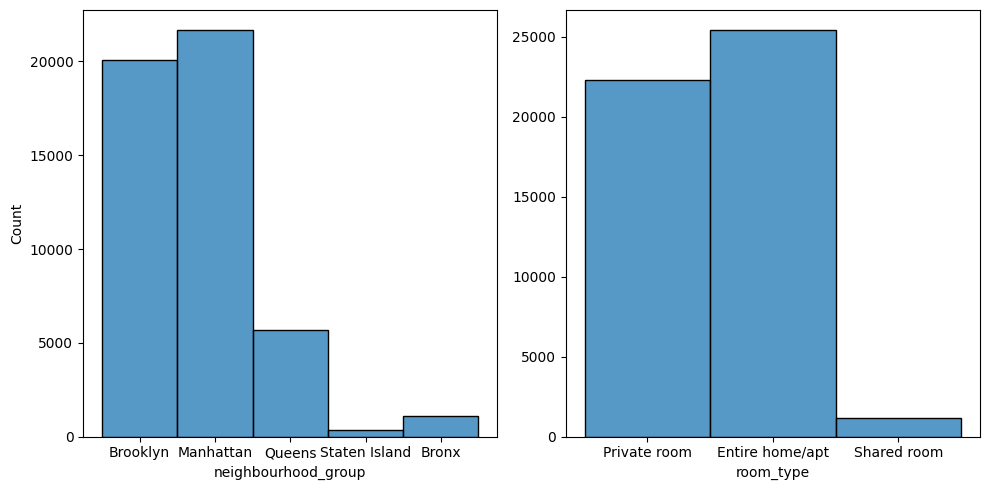

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (10, 5))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(ylabel = None)



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()





Analize numerico

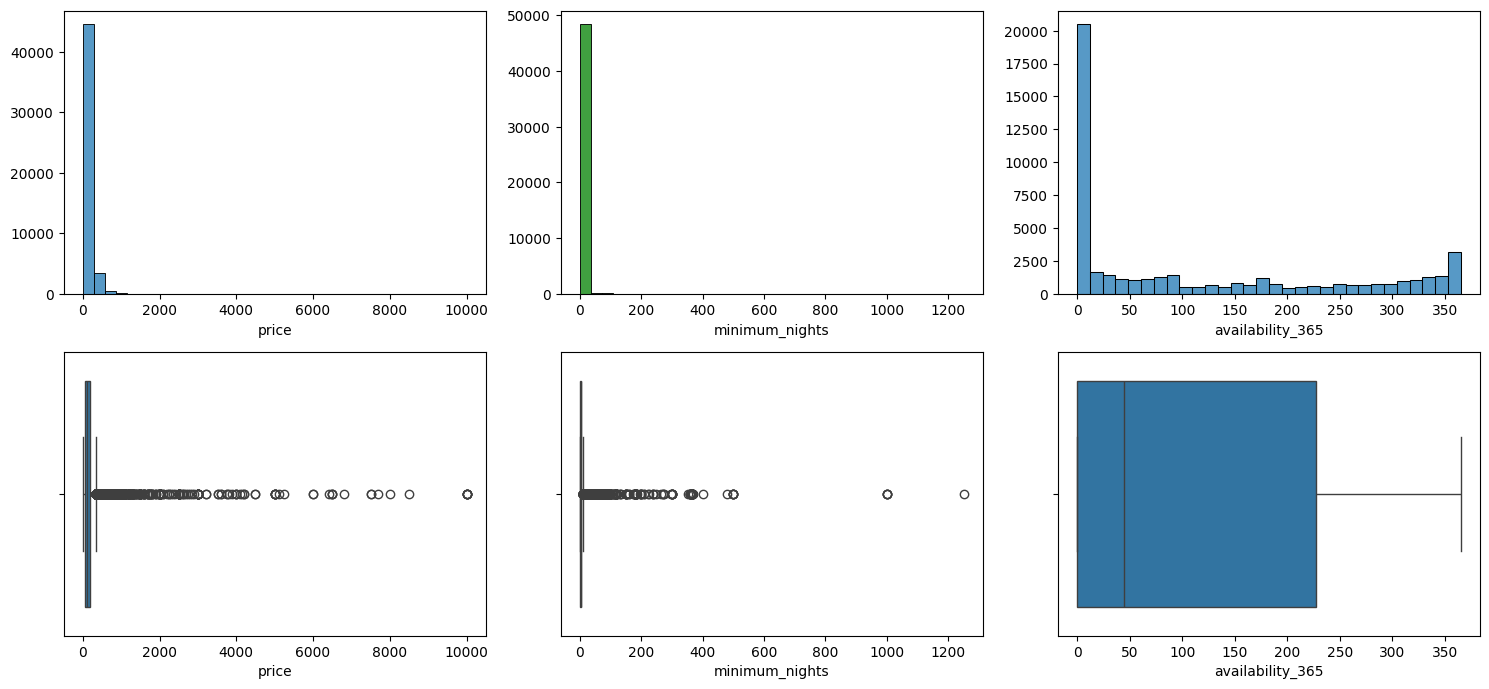

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = total_data, x = "price",bins=35).set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights",bins=35, color='green').set(ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = total_data, x = "availability_365").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "availability_365")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Numerico-numerico

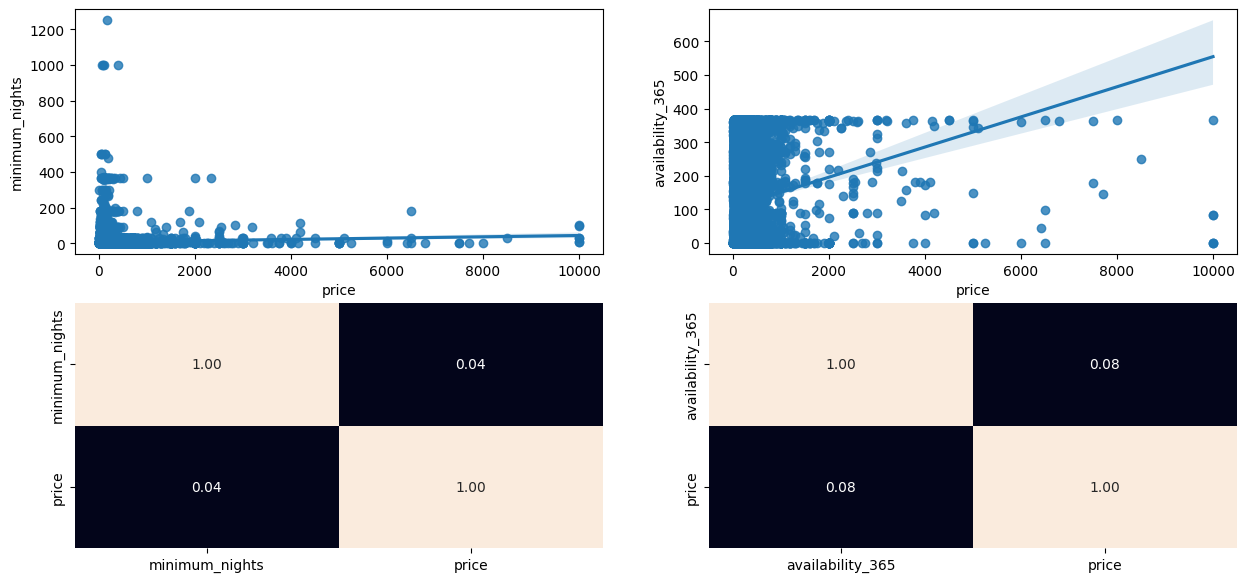

In [30]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.regplot(ax = axis[0, 0], data = total_data , x = "price", y = "minimum_nights")
sns.heatmap(total_data[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data , x = "price", y = "availability_365")
sns.heatmap(total_data[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)


plt.show()

No hay relacion entre precio y minimun noches

In [ ]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))

sns.countplot(ax = axis[0], data = total_data, x = "room_type", hue = "neighbourhood_group")
sns.countplot(ax = axis[1], data = total_data, x = "neighbourhood", hue = "neighbourhood_group")

In [ ]:
total_data['room_type_n'] = pd.factorize(total_data['room_type'])[0]
total_data['neighbourhood_n'] = pd.factorize(total_data['neighbourhood'])[0]
total_data['neighbourhood_group_n'] = pd.factorize(total_data['neighbourhood_group'])[0]
total_data.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_n,neighbourhood_group_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,2,1
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,3,0
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,4,1


#### Paso 4. Análisis multivariante

### Survive - (neighbourhood_group, price)

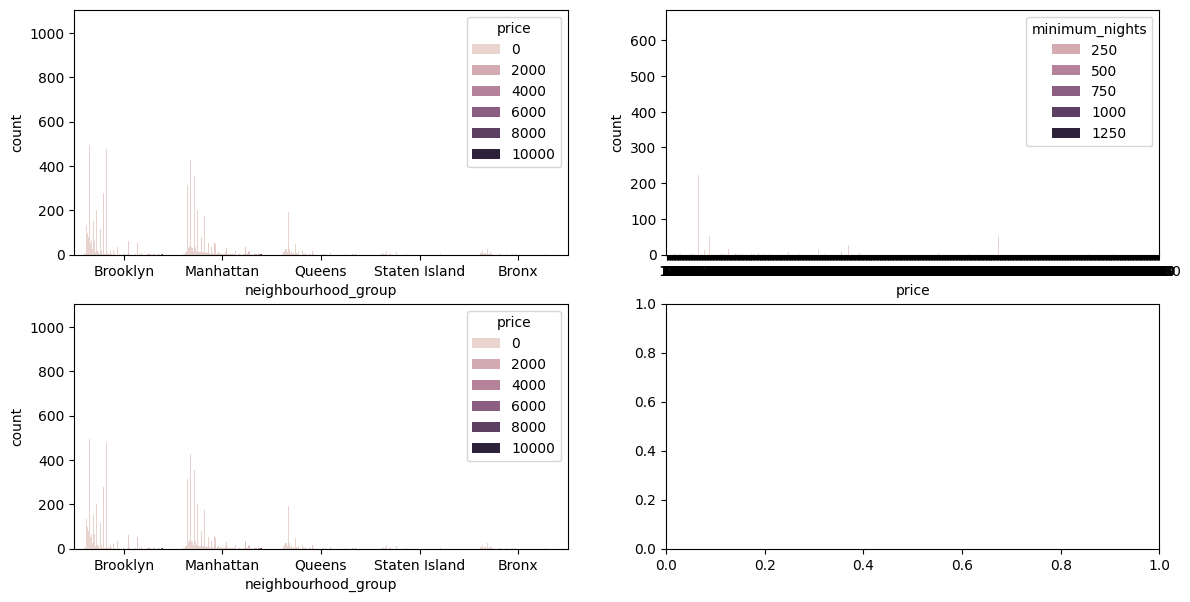

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (14, 7))

sns.countplot(total_data, x = "neighbourhood_group", hue = "price", ax = axis[0, 0])
sns.countplot(total_data, x = "price", hue = "minimum_nights", ax = axis[0, 1])
sns.countplot(total_data, x = "neighbourhood_group", hue = "price", ax = axis[1, 0])

plt.show()


### 
room_type-price

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U15'), dtype('float64')) -> None

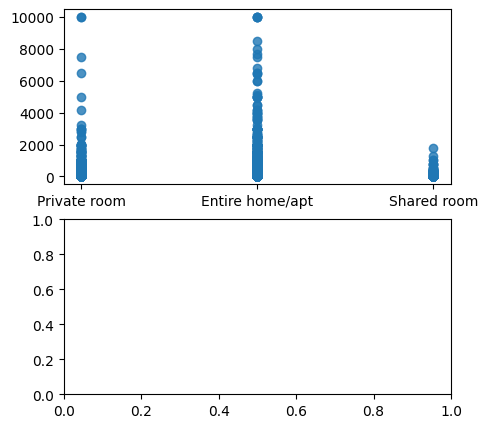

In [ ]:
fig, axis = plt.subplots(2, 1, figsize = (5, 5))

sns.regplot(total_data, x = "room_type", y = "price", ax = axis[0])
sns.heatmap(total_data[["room_type", "price"]].corr(), ax = axis[1], annot = True)

plt.show()